# Лабораторная работа 2.1
**Тема.** Числовые ряды
<br>
**Цель.** Научиться исследовать числовые ряды на сходимость и контролировать результаты с помощью средств системы Maple (SageMath).

## **Задание 1.** Постройте в прямоугольной системе координат 10 первых членов ряда и убедитесь в том, что для него выполняется необходимый признах сходимости.

- Найдите сумму ряда и сравните с результатом, полученным в Maple (SageMath).
- Определите минимальный порядок частичной суммы ряда, приближающей сумму ряда с точностью, не превышающей 0,1.
- Проиллюстрируйте свой результат с помощью графических средств системы Maple (SageMath).

In [1]:
Nmin = 3

n = var('n')
a = ((4 - 5 * n)/(n * (n - 1) * (n - 2)))
show(a)

-(5*n - 4)/((n - 1)*(n - 2)*n)

Построим 10 первых членов ряда.

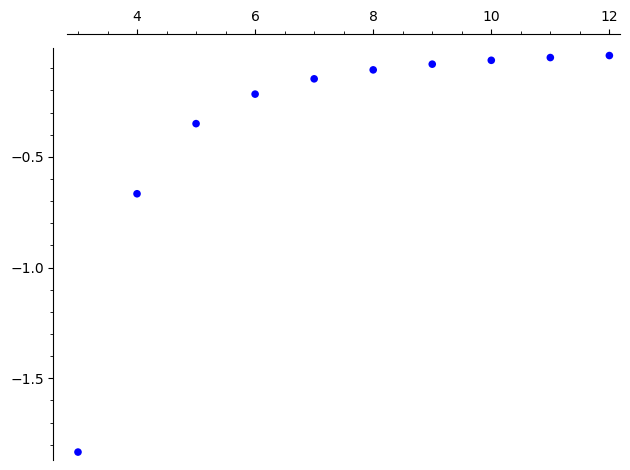

In [2]:
p = list_plot([(k, a(n=k)) for k in range(3, 13)], color='blue', marker='o', size=30)
show(p)

Формулировку необходимого условия сходимости возьмем из учебника Фихтенгольца ["Курс дифференциального и интегрального исчисления" (c. 293-294)](https://ikfia.ysn.ru/wp-content/uploads/2018/01/Fihtengolc_t2_1964ru.pdf)
</br>
> Сумма любого числа членов ряда, следующих за достаточно далеким, должна быть произвольно мала
$$
\lim_{n\to\infty} a_{n} = 0
$$

In [3]:
show(round(limit(a(n=n), n=oo), 5) == 0)

True

Поскольку ряд сходится, получить его сумму можно получив частную сумму с большим ограничением

In [4]:
Nmax = 1000
partial_sum = sum(a(n=n).n() for n in range(Nmin, Nmax+1))
print(f"Частичная сумма до N={Nmax}:")
show(partial_sum)

Частичная сумма до N=1000:


-3.99499699699699

Возьмем полученную частичную сумму за общую сумму ряда и найдем количество `N` членов ряда (начиная с первого), чья частичную сумма будет приближенна к общей с нужной точностью.

Определим фунцию, которая отбросит не интересующую нас часть дроби.

In [5]:
def truncate(x, n):
    factor = 10 ** n
    return int(x * factor) / factor

Определим `N` номер искомого члена ряда

In [6]:
N = Nmin
partial_sums = [0]
actual_sum = truncate(partial_sum, 2)
while abs(actual_sum - truncate(partial_sums[-1], 2)) > 0.1 :
    partial_sums.append(sum(a(n=n).n() for n in range(3, N)))
    N+=1

print(f"Минимальный порядок частичной суммы N = {N} (погрешность ≤ 0.1)")

Минимальный порядок частичной суммы N = 49 (погрешность ≤ 0.1)


Построим график полученных частичных сумм

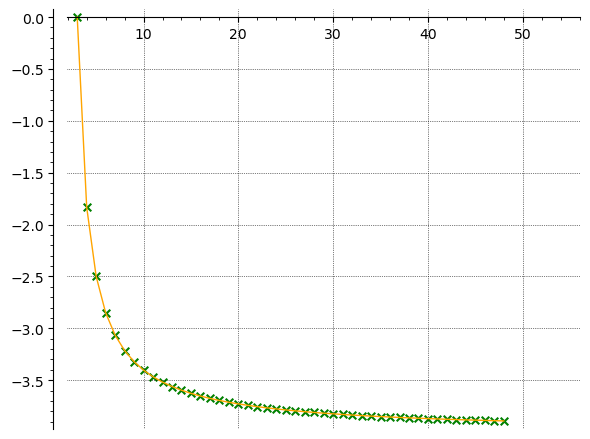

In [7]:
partial_sums = partial_sums[1:]
ps_points = [(n+3, partial_sums[n]) for n in range(len(partial_sums))]

p = list_plot(ps_points, color='green', marker='x', size=30)
p += line(ps_points, color='orange')
p.show(gridlines=True, figsize=6, xmax=55)

И покажем, что последня из сумм в списке (искомая) является первой, кто приблизился к общей сумме достаточно близко

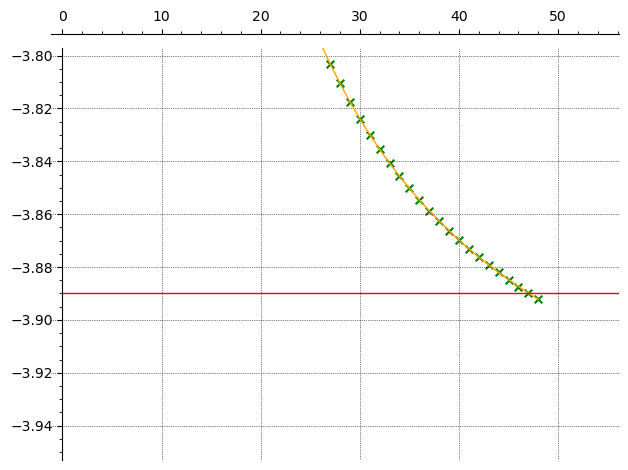

In [8]:
p += line([(0, actual_sum + 0.1), (100, actual_sum + 0.1)], color='red', linestyle='-')
p.show(gridlines=True, xmax=55, ymin=-3.95, ymax=-3.8)

## **Задание 2.** Докажите, что ряд удовлетворяет условиям теоремы Лейбница.

- Найдите минимальный порядок частичной суммы ряда, приближающей
его сумму с точностью $ \alpha $, и сравните с результатом, полученным в СКА.
- Проиллюстрируйте свой результат с помощью графических средств.

In [9]:
alpha = 0.01

n = var('n')
a = (-1)^(n + 1)/factorial(n)

show(a)

(-1)^(n + 1)/factorial(n)

Формулировка критерия Лейбница (Курс высшей математики (Кудрявцев, Демидович), г. 1989, с. 425):

> Если модули членов знакочередующегося ряда монотонно убывает при возрастании их номера, т.е.
> $$
v_{1} \ge v_{2} \ge v_{3} \ge v_{4} \ge ... $$
> и $ n $-й член ряда при неограниченном возрастании $ n $ стремится к нулю, т.е.
> $$
\lim_{n\to\infty} v_{n} = 0 $$
> то ряд этот сходится (вообще говоря, не абсолютно)

Проверим монотонность убывания функции

In [10]:
show(all(abs(a(n=k)) >= abs(a(n=k+1)) for k in range(1, 500)))

True

Проверим предел

In [11]:
show(round(limit(a(n=n), n=oo), 5) == 0)

True

По критерию Лейбница ряд сходится. Исходя из этого можно будет выполнить логику из предыдущего задания для нахождения минимального порядка частичной суммы.

In [12]:
Nmax = 1000
partial_sum = sum(a(n=n).n() for n in range(Nmin, Nmax+1))

print(f"Частичная сумма до N={Nmax}:")
show(partial_sum)

N = Nmin
partial_sums = [0]
actual_sum = truncate(partial_sum, 2)
while abs(actual_sum - truncate(partial_sums[-1], 2)) > 0.1 :
    partial_sums.append(sum(a(n=n).n() for n in range(3, N)))
    N+=1

print(f"Минимальный порядок частичной суммы N = {N} (погрешность ≤ 0.1)")

Частичная сумма до N=1000:


0.132120558828558

Минимальный порядок частичной суммы N = 5 (погрешность ≤ 0.1)


Построим график полученных частичных сумм

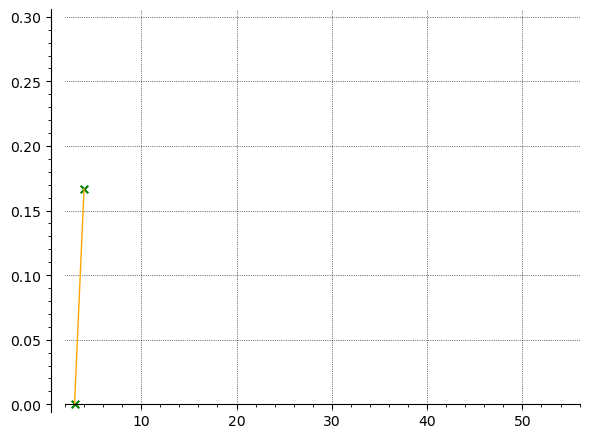

In [13]:
partial_sums = partial_sums[1:]
ps_points = [(n+3, partial_sums[n]) for n in range(len(partial_sums))]

p = list_plot(ps_points, color='green', marker='x', size=30)
p += line(ps_points, color='orange')
p.show(gridlines=True, figsize=6, xmax=55, ymax=0.3)

И покажем, что последня из сумм в списке (искомая) является первой, кто приблизился к общей сумме достаточно близко

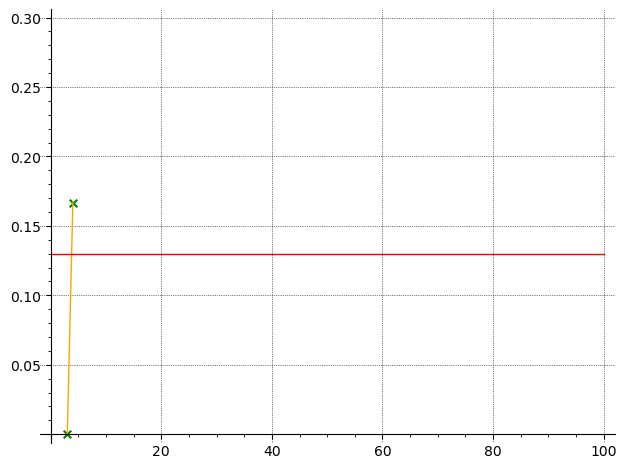

In [14]:
p += line([(0, actual_sum), (100, actual_sum)], color='red', linestyle='-')
p.show(gridlines=True, ymax=0.3)

## **Задание 3.** Докажите справедливость равенства, убедившись в сходимости соответствующего числового ряда с помощью предельных признаков Даламбера или Коши. Проведите контрольные расчеты.

In [15]:
n = var('n')
a = n^n/factorial(2 * n)

show(a)

n^n/factorial(2*n)

Формулировка признака Даламбера (Mathematical handbook for scientists ans engineers (Granino A. Korn, Theresa M. Korn, в переводе Арамановича, Березмана, Вайнштейна, Румшиского и Цлафа), г. 1973, с. 139):
> Ряд $ a_{0} + a_{1} + a_{2} + ... $ с положительными членами сходится, если существует такой номер $ N $, что при $ n > N $ выполняется хотя бы одно из следующих условий (прим. Берется только критерий Даламбера):
</br>
> <...>
</br>
> 2. По крайней мере одна из велечин
$$
<...> \frac{a_{n+1}}{a_{n}} <...>
$$
</br>
> <...>
</br>
> имеет точную верхнюю границу $ A < 1 $

Подготовим выражение

In [16]:
a_check = simplify(a.subs(n=n+1) / a)
show(a_check)

(n + 1)^(n + 1)*factorial(2*n)/(n^n*factorial(2*n + 2))

Найдем первое потенциальное значение $ N $

In [17]:
N = 1
while a_check.subs(n=N) > 1:
    N += 1
show(N)

1

Ряд начинает сходится уже при при первой подстановке, убедимся в этом, выведя первые 10 членов ряда

In [18]:
for i in range(0, 10):
    show(a_check.subs(n=i))

1/2

1/3

9/40

32/189

625/4608

3888/34375

117649/1213056

1048576/12353145

43046721/570425344

500000000/7360989291

Проверим, выполнится ли критерий на $ \infty $

In [19]:
show(round(limit(a_check(n=n), n=oo), 5) == 0)

True

Теперь используем радикальный признак Коши. Его формулировка (Mathematical handbook for scientists ans engineers (Granino A. Korn, Theresa M. Korn, в переводе Арамановича, Березмана, Вайнштейна, Румшиского и Цлафа), г. 1973, с. 139):
> Ряд $ a_{0} + a_{1} + a_{2} + ... $ с положительными членами сходится, если существует такой номер $ N $, что при $ n > N $ выполняется хотя бы одно из следующих условий (прим. Берется только критерий Даламбера):
</br>
> 2. По крайней мере одна из велечин
$$
<...> \sqrt[n]{a_{n}} <...>
$$
> имеет точную верхнюю границу $ A < 1 $

Подготовим выражение

In [20]:
a_check = simplify(a ^ (1/n))
show(a_check)

(n^n/factorial(2*n))^(1/n)

Найдем $ N $

In [21]:
N = 1
while a_check.subs(n=N) > 1:
    N += 1
show(N)

1

Проверим, выполнится ли критерий на $ \infty $

In [22]:
show(round(limit(a_check(n=n), n=oo), 5) == 0)

True

Как видно, ряд сходится как по критерию Даламбера так и по радикальному критерию Коши